In [1]:
from apg_imports import *
%matplotlib inline

We try inpainting a few images...start with our favorite cameraman

/home/vncuser/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


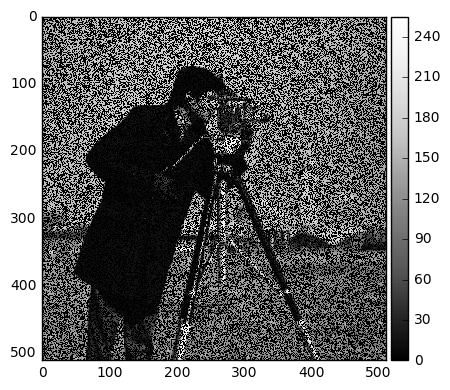

In [2]:
random_proj = np.random.randint(2, size=data.camera().shape)
splotchy = np.multiply(random_proj, data.camera())
io.imshow(splotchy,  cmap='Greys_r')

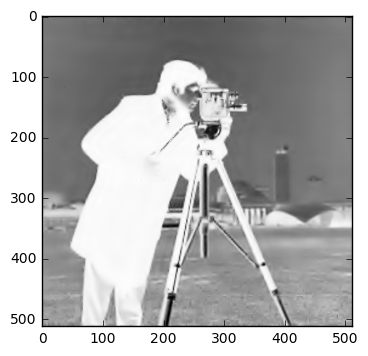

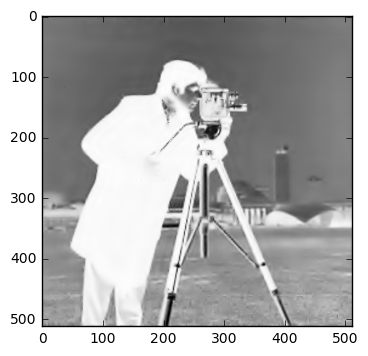

In [24]:
ans = apg(random_proj, splotchy, 25, 5 , 20, 'db2')

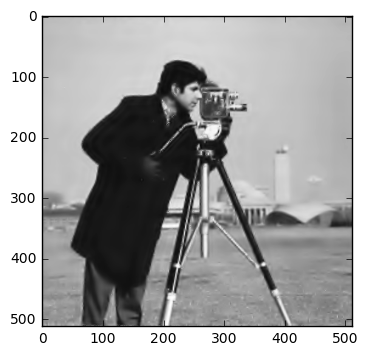

In [27]:
plt.imshow(ans, cmap='Greys_r')

Before we move forward, we need some functions to pad the images properly to be of the form of powers of two. Cameraman was conveniently 512x512. 

In [152]:
def pad_image(im):
    set_len = len(im[0])
    
    if (np.log2(set_len))%1!=0:
        power = int(np.log2(set_len) + 1)
        conv = np.array([ np.pad(x, int(((2**power)-set_len)/2), mode='symmetric')  for x in im])
        
    else:
        conv = np.array(im)
        
    l, w = conv.shape
    
    if w%2!=0:
        conv =  np.append(conv, [[x] for x in conv[::,-1]], axis=1)
        
    return conv


def make_even(I):
    I = np.array(I)
    return (pad_image(pad_image(I).T)).T

def unmake_even(evened_image, orig_image):
    l,w = np.array(orig_image).shape
    evened_image = np.array(evened_image)
    return evened_image[int((len(evened_image) - l)/2):int((len(evened_image) - l)/2)+l,\
                       int((len(evened_image) -w)/2):int((len(evened_image) - w)/2)+w]

Great! Now we're ready to go.

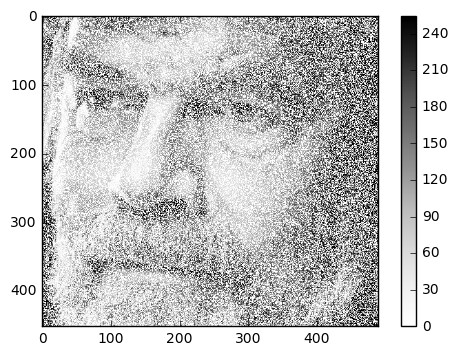

In [146]:
im = Image.open('image1.png')
I = np.array(im)
I = switch_black_white(I) #this is because I want the "bad pixels" at 0.
plt.imshow(I, cmap='Greys')
plt.colorbar()

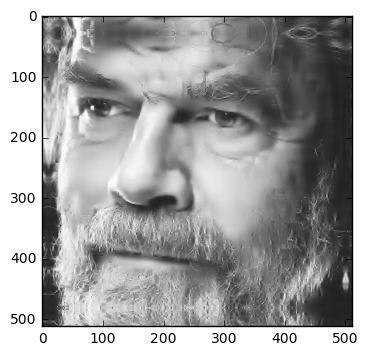

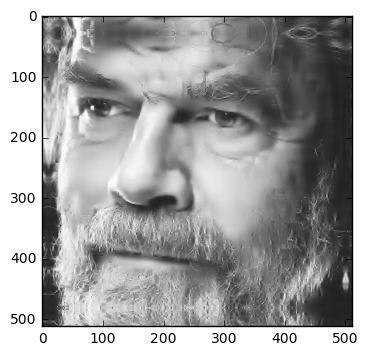

In [151]:
ans = apg(np.array((make_even(I)!=0),dtype=float), make_even(I), 25, 5, 20)
#artifacts at the edges are due to padding...we get rid of that in the next cell

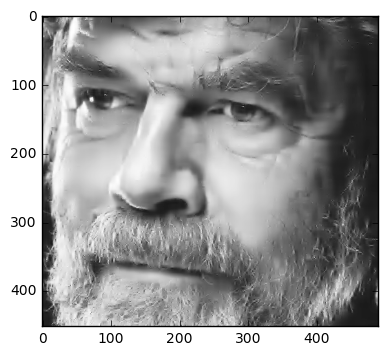

In [156]:
plt.imshow(unmake_even(ans, I), cmap='Greys')
#got rid of padding, and artefacts!

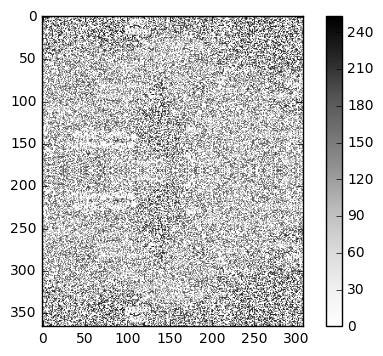

In [184]:
im = Image.open('image5.png')
mirror_im = ImageOps.flip(im) 
I = np.array(im)
I = np.vstack((im, mirror_im)) #this is cause my stationary transform works only on even
plt.imshow(I, cmap='Greys')
plt.colorbar()

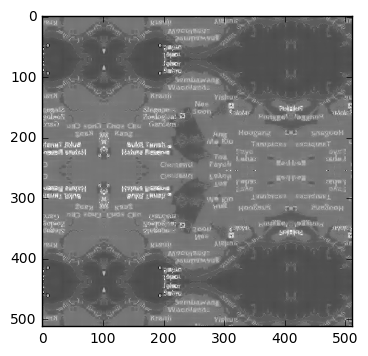

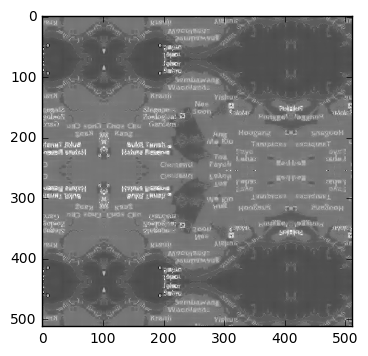

In [196]:
ans = apg(np.array((make_even(I)!=0),dtype=float), make_even(I), 10, 5, 50, 'haar')

In [ ]:
ch = unmake_even(ans, I)
plt.imshow( kill_negative(ch[0:int(ch.shape[1]/2), ::]), cmap='Greys_r')
plt.colorbar()

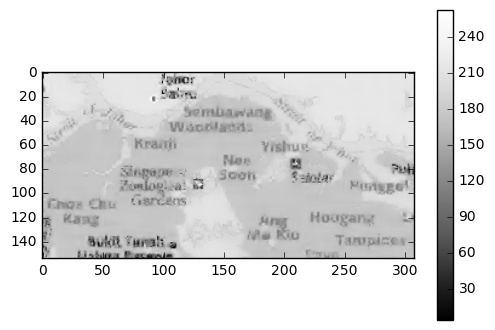

In [197]:
#10, 5, 50, 'haar'

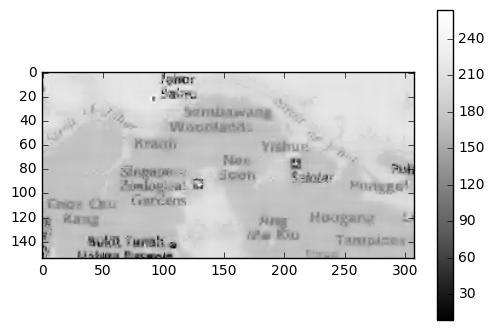

In [195]:
#20, 5, 50, 'haar'

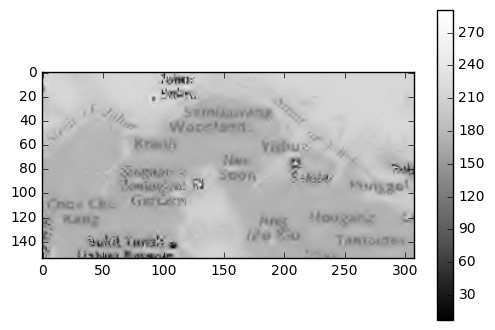

In [192]:
#from 25, 7, 50, 'bior6.8'


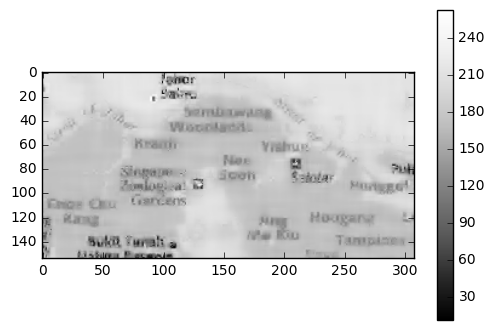

In [189]:
#from our default haar... #25, 5, 20, haar

Now let's try out 'image2'

In [164]:
import PIL
from PIL import ImageOps

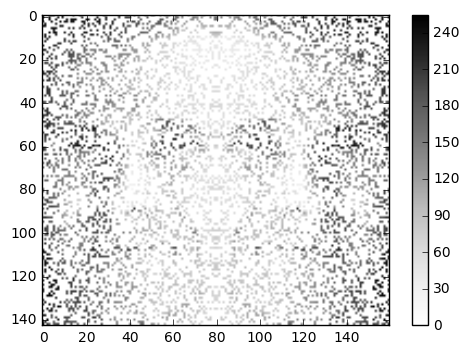

In [167]:
im = Image.open('image2.png')
mirror_im = ImageOps.mirror(im) 
I = np.array(im)
I = np.hstack((im, mirror_im)) #this is because I am lazy and don't want to change "make_even"
I = switch_black_white(I) #this is because I want the "bad pixels" at 0.
plt.imshow(I, cmap='Greys')
plt.colorbar()
#mask = np.array(I==0, dtype=float) #this is the "A" matrix

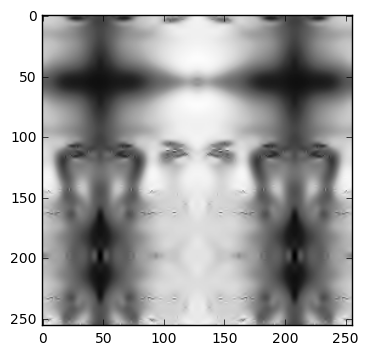

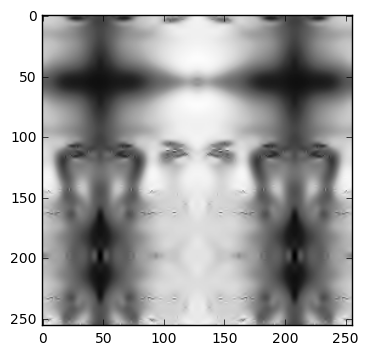

In [175]:
ans = apg(np.array((make_even(I)!=0),dtype=float), make_even(I), 25, 7, 50, 'bior6.8')

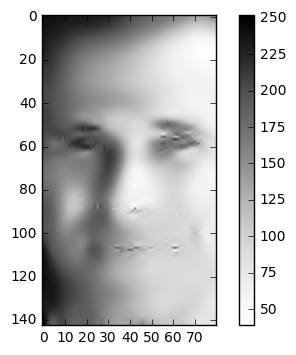

In [176]:
ch = unmake_even(ans, I)
plt.imshow( kill_negative(ch[::, 0:int(ch.shape[1]/2)]), cmap='Greys')
plt.colorbar()